In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import cm

In [2]:
wages_inds = pd.read_csv('at_constant_prices_by_industry.csv')
non_isr = pd.read_csv('non_israeli_wages.csv')
hightech_empl = pd.read_csv('num_employees_hightech.csv')
empl_by_sector = pd.read_csv('num_of_employees_by_sector.csv')
total_empl_perc = pd.read_csv('perc_of_total_employees_23.csv')
positions_by_industry = pd.read_csv('positions_by_industry.csv')
wages_by_sector = pd.read_csv('wages_by_sector.csv')
hightech_wages = pd.read_csv('wages_hightech.csv')
analysts = pd.read_csv('analyst_position_data.csv')

AVERAGE SALARIES BY INDUSTRY

In [3]:
#Renaming the columns for the better visualization:

wages_inds = wages_inds.rename(columns={'Other_service_activities': 'Other Services',
                                        'Arts,_entertainment_and_recreation': 'Arts & Entertainment',
                                        'Homan_health_and_social_work_activities': 'Health',
                                        'Education': 'Education',
                                        'Local,_public_and_defence__administration_and_social_security,_and_Extraterritorial_organizations_and_bodies' : 'Government & Public Services',
                                        'Administrative_and_support_service_activities' :'Administration & Support Services',
                                        'Professional,_scientific_and_technical_activities':'Science',
                                        'Real_estate_activities': 'Real Estate',
                                        'Financial_and_insurance_activities': 'Finance and Insurance',
                                        'Information_and_communication' : 'Information & Communication',
                                        'Accomodation_and_food_service_activities' : 'Accomodation & Food',
                                        'Transportation,_storage,_postal_and_courier_activities' : 'Logistics',
                                        'wholesale_and_retail_trade_and_repair_of_motor_vehicles' : 'Retail & Auto',
                                        'Construction' : 'Construction',
                                        'Electricity_and_water_supply,_sewerage_and_waste_management' : 'Utility Services',
                                        'Manufacturing' : 'Manufacturing',
                                        'Mining_and_quarrying' : 'Mining & Quarrying',
                                        'Agriculture,_forestry_and_fishing' : 'Agri-Fishing',
                                        'Total_Economy' : 'Total Economy'
                                         })

In [4]:
wages_inds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Date                               18 non-null     object
 1   Other Services                     18 non-null     object
 2   Arts & Entertainment               18 non-null     object
 3   Health                             18 non-null     object
 4   Education                          18 non-null     object
 5   Government & Public Services       18 non-null     object
 6   Administration & Support Services  18 non-null     object
 7   Science                            18 non-null     object
 8   Real Estate                        18 non-null     object
 9   Finance and Insurance              18 non-null     object
 10  Information & Communication        18 non-null     object
 11  Accomodation & Food                18 non-null     object
 12  Logistics 

In [5]:
# The datatype is wrong. All the columns, expect "Date" should be in float format.
numeric_columns = wages_inds.columns.difference(['Date'])
wages_inds[numeric_columns] = wages_inds[numeric_columns].applymap(lambda x: int(str(x).replace(',', '').replace('\t', '')) if isinstance(x, str) else x)

In [6]:
# Calculating average salaries
averages = wages_inds[numeric_columns].mean().sort_values(ascending=False).round(1)
print(averages)

Mining & Quarrying                   29707.9
Information & Communication          27818.2
Finance and Insurance                21391.8
Utility Services                     20679.8
Manufacturing                        17295.4
Government & Public Services         17056.6
Science                              17054.4
Real Estate                          13653.3
Logistics                            12808.6
Total Economy                        12299.4
Construction                         11549.6
Retail & Auto                        10236.9
Education                             9272.1
Health                                9015.3
Agri-Fishing                          8497.1
Administration & Support Services     7146.7
Arts & Entertainment                  7041.9
Other Services                        6363.1
Accomodation & Food                   5734.6
dtype: float64


C:\Users\rzagu\AppData\Local\Temp\ipykernel_11940\2261321994.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


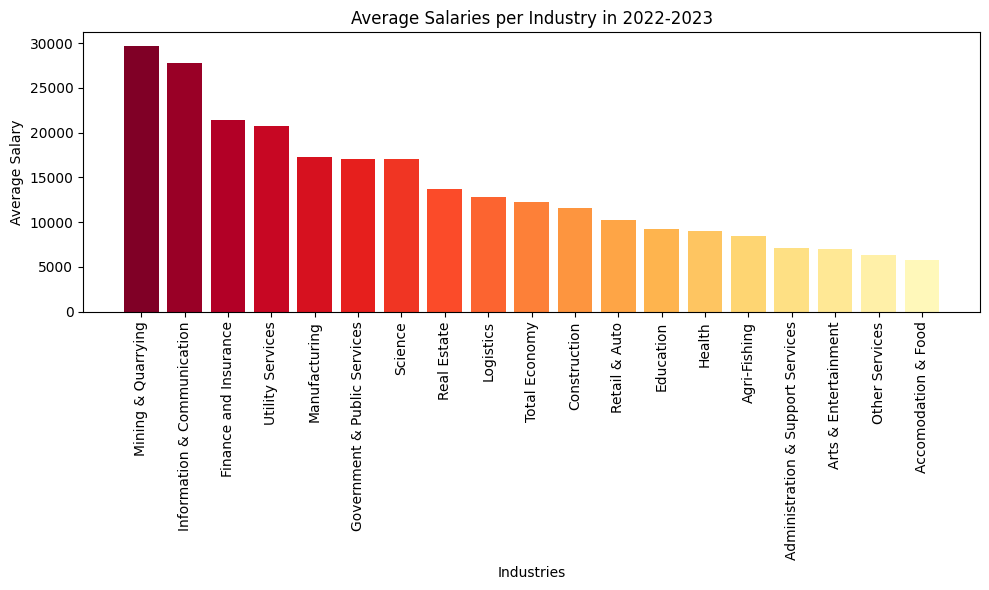

In [7]:
# Createing a bar chart
cmap = cm.get_cmap('YlOrRd')
plt.figure(figsize=(10, 6))
bars = plt.bar(averages.index, averages.values, color=[cmap(1-i/len(averages)) for i in range(len(averages))])
plt.xlabel('Industries')
plt.ylabel('Average Salary')
plt.title('Average Salaries per Industry in 2022-2023')
plt.xticks(rotation=90)

plt.tight_layout()  # Ensuring the labels fit within the figure boundaries
plt.show()

In [8]:
print(wages_inds.columns.tolist())

['Date', 'Other Services', 'Arts & Entertainment', 'Health', 'Education', 'Government & Public Services', 'Administration & Support Services', 'Science', 'Real Estate', 'Finance and Insurance', 'Information & Communication', 'Accomodation & Food', 'Logistics', 'Retail & Auto', 'Construction', 'Utility Services', 'Manufacturing', 'Mining & Quarrying', 'Agri-Fishing', 'Total Economy']


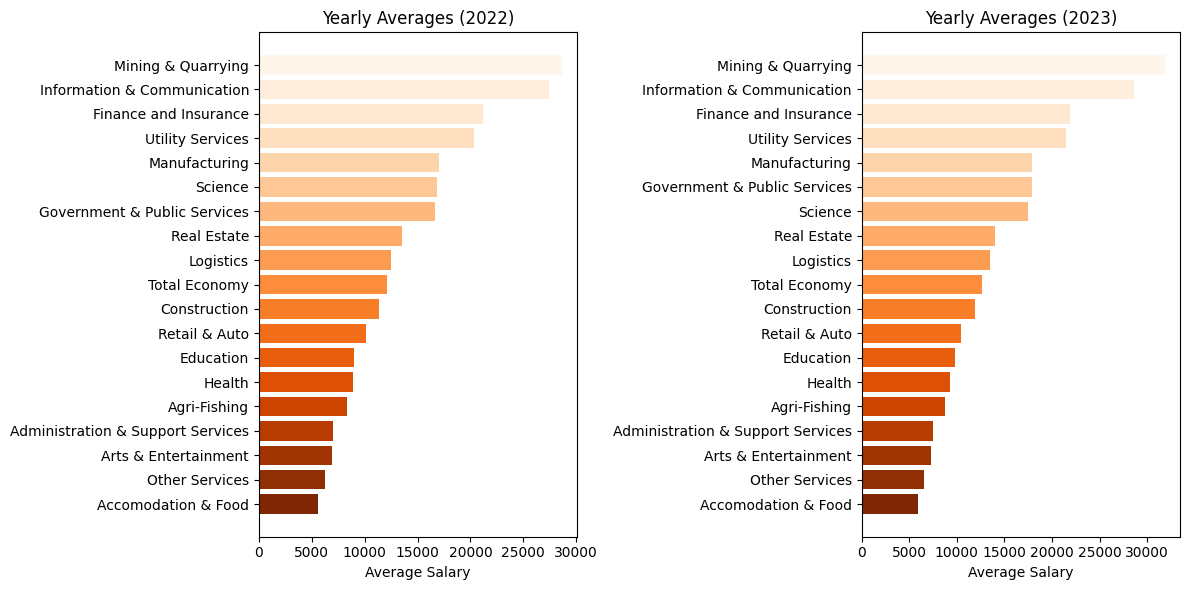

In [9]:
# Comparing results for 2022 and 2023

wages_inds['Date'] = pd.to_datetime(wages_inds['Date'], format='%B, %Y') # Converting the 'Date' column to datetime

# Separating data for 2022 and 2023
wages_inds_2022 = wages_inds[wages_inds['Date'].dt.year == 2022]
wages_inds_2023 = wages_inds[wages_inds['Date'].dt.year == 2023]

# Calculating yearly averages
yearly_averages_2022 = wages_inds_2022[['Other Services', 'Arts & Entertainment', 'Health', 'Education', 'Government & Public Services', 'Administration & Support Services', 'Science', 'Real Estate', 'Finance and Insurance', 'Information & Communication', 'Accomodation & Food', 'Logistics', 'Retail & Auto', 'Construction', 'Utility Services', 'Manufacturing', 'Mining & Quarrying', 'Agri-Fishing', 'Total Economy']].mean().round(2)
yearly_averages_2023 = wages_inds_2023[['Other Services', 'Arts & Entertainment', 'Health', 'Education', 'Government & Public Services', 'Administration & Support Services', 'Science', 'Real Estate', 'Finance and Insurance', 'Information & Communication', 'Accomodation & Food', 'Logistics', 'Retail & Auto', 'Construction', 'Utility Services', 'Manufacturing', 'Mining & Quarrying', 'Agri-Fishing', 'Total Economy']].mean().round(2)

yearly_averages_2022 = yearly_averages_2022.sort_values(ascending=False)
yearly_averages_2023 = yearly_averages_2023.sort_values(ascending=False)

# Creating a gradient pallete
colors = plt.cm.Oranges(np.linspace(0, 1, len(yearly_averages_2022)))

# Create two separate barcharts
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.barh(yearly_averages_2022.index, yearly_averages_2022, color=colors)
plt.xlabel('Average Salary')
plt.title('Yearly Averages (2022)')
plt.gca().invert_yaxis()  


plt.subplot(1, 2, 2)
plt.barh(yearly_averages_2023.index, yearly_averages_2023, color=colors)
plt.xlabel('Average Salary')
plt.title('Yearly Averages (2023)')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

We can also see that "Total Economy" is located in the center of the data, therefore the calculations were made correctly.